In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using GLMakie

In [3]:
using Revise
includet("./base.jl")
using StatsBase

Precompiling packages...
  17066.2 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 20 seconds. 528 already precompiled.


In [4]:
using CairoMakie

# No-space

In [23]:
@time xx = main3();

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


 16.457074 seconds (50.17 M allocations: 4.181 GiB, 2.85% gc time, 3.88% compilation time)


In [27]:
countmap(xx.retcodes)

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 5000

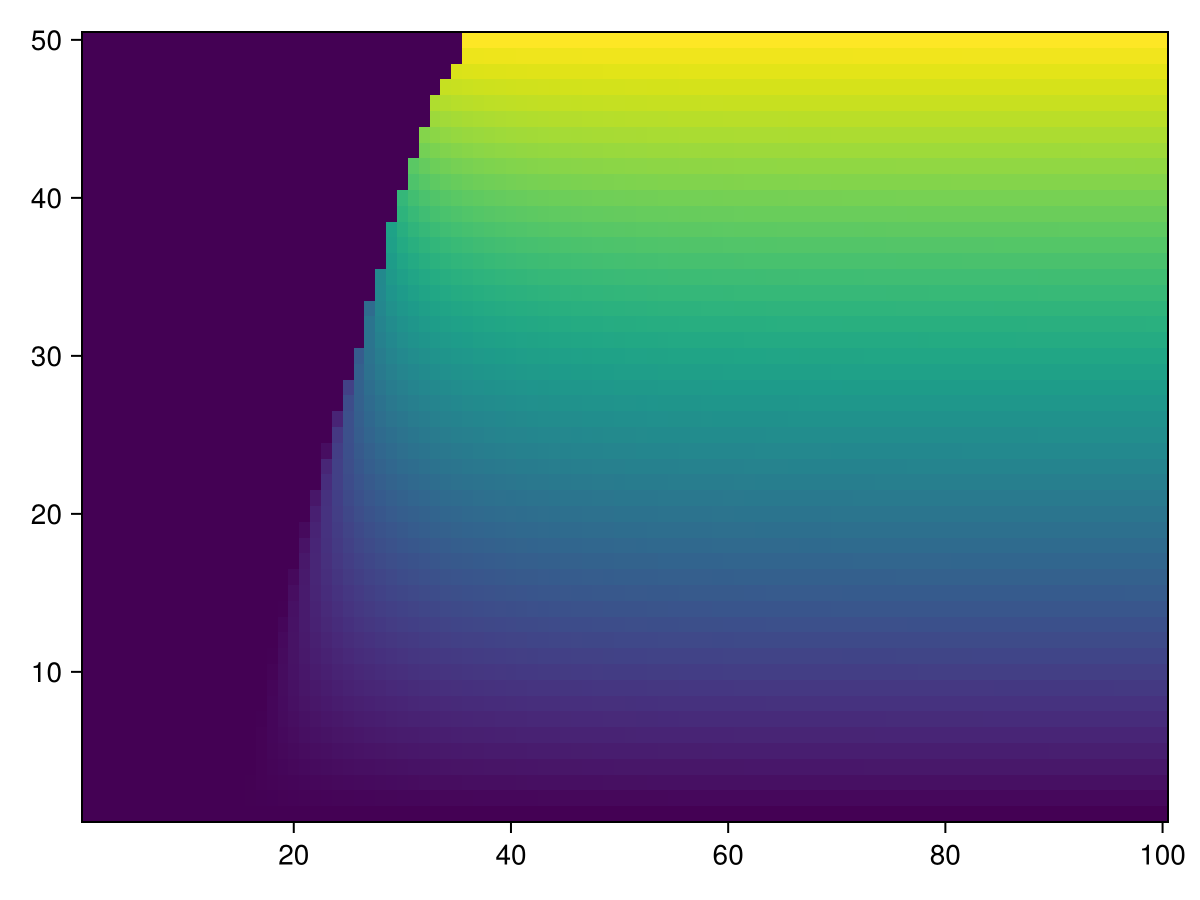

In [24]:
heatmap(getindex.(xx.final_states, 3))

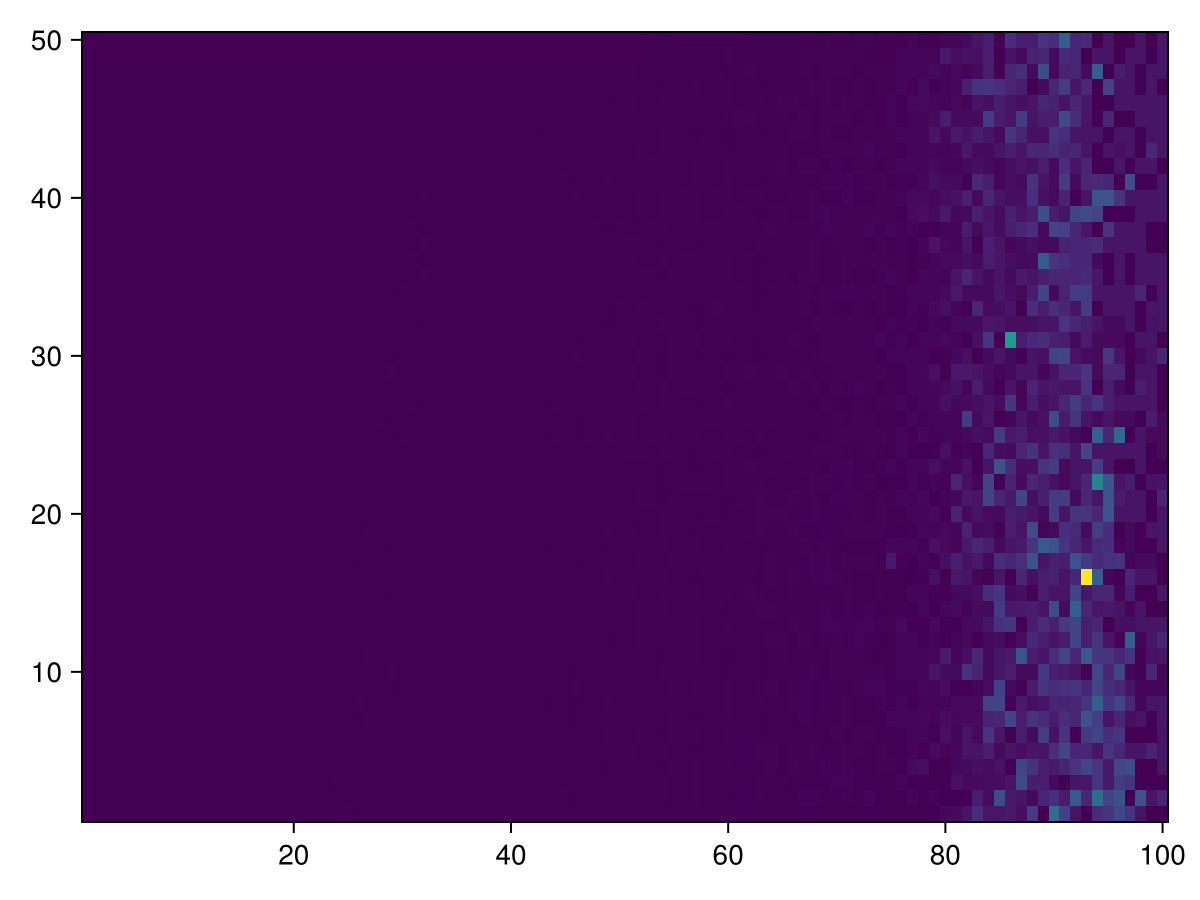

In [13]:
heatmap(maximum.(abs, mmicrmresid.(xx.final_states, xx.params)))